<a href="https://colab.research.google.com/github/shibilakp/loan-application-notebook/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Please ensure the file 'loan_approval.csv' is uploaded to your Colab environment and the path is correct.
df = pd.read_csv("/content/loan_approval.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


preprocessing

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1


In [ ]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1
44999,24,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3,628,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   44999 non-null  object 
 2   person_education                44997 non-null  object 
 3   person_income                   44999 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           44998 non-null  object 
 6   loan_amnt                       44998 non-null  float64
 7   loan_intent                     44999 non-null  object 
 8   loan_int_rate                   44999 non-null  float64
 9   loan_percent_income             44997 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.499900e+04,45000.000000,4.499800e+04,44999.000000,44997.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031762e+04,5.410333,9.635541e+03,11.012625,0.139729,5.867489,632.608756,0.222222
std,6.045108,8.042282e+04,6.063532,1.332906e+04,3.182025,0.087213,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,-3.000000e+03,-40.000000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720200e+04,1.000000,5.000000e+03,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8.000000e+03,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578600e+04,8.000000,1.223050e+04,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,2.500000e+06,200.000000,0.660000,30.000000,850.000000,1.000000


checking null

In [ ]:
df.isna()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
person_age,0
person_gender,1
person_education,3
person_income,1
person_emp_exp,0
person_home_ownership,2
loan_amnt,2
loan_intent,1
loan_int_rate,1
loan_percent_income,3


In [ ]:
df.dropna(inplace=True)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [ ]:
df.duplicated().sum()

np.int64(0)

boxploting

{'whiskers': [<matplotlib.lines.Line2D at 0x79244b583a10>,
 'caps': [<matplotlib.lines.Line2D at 0x79244b578dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79244b59b7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79244b577c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x79244b577050>],
 'means': []}

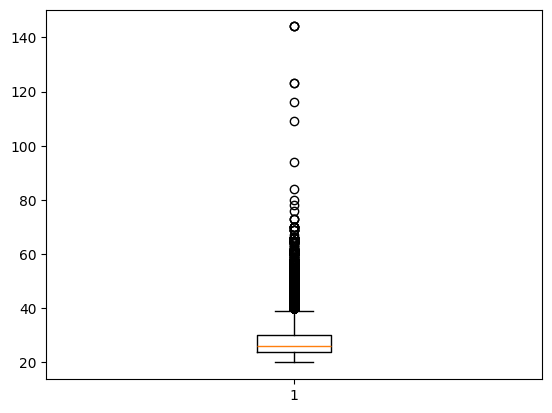

In [ ]:
#plt.boxplot(df['person_age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79244b2d0850>,
 'caps': [<matplotlib.lines.Line2D at 0x79244b2d1c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x79244b297f90>],
 'medians': [<matplotlib.lines.Line2D at 0x79244b2d31d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79244b2d3b50>],
 'means': []}

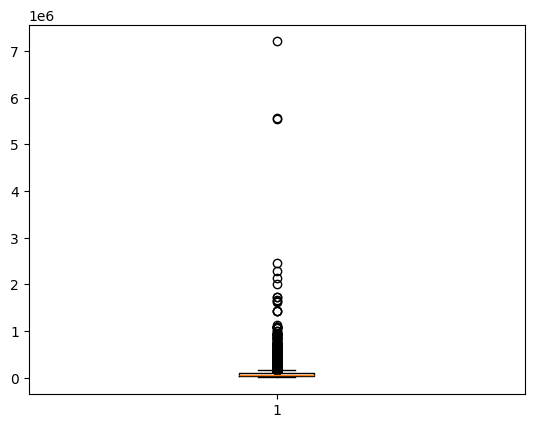

In [ ]:
plt.boxplot(df['person_income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79244912f610>,
 'caps': [<matplotlib.lines.Line2D at 0x7924491389d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79244912ec10>],
 'medians': [<matplotlib.lines.Line2D at 0x792449139c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x79244913a590>],
 'means': []}

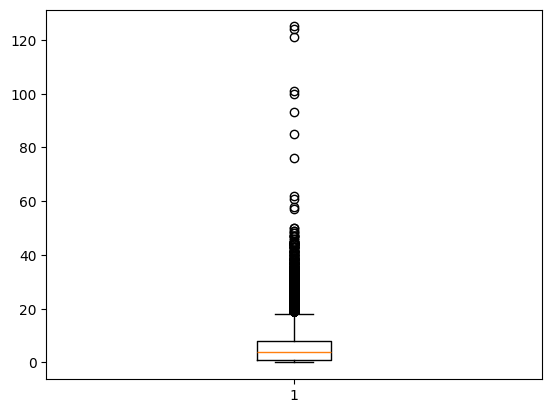

In [ ]:
plt.boxplot(df['person_emp_exp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x792449196bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x792449197f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7924491962d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7924491a5210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7924491a5ad0>],
 'means': []}

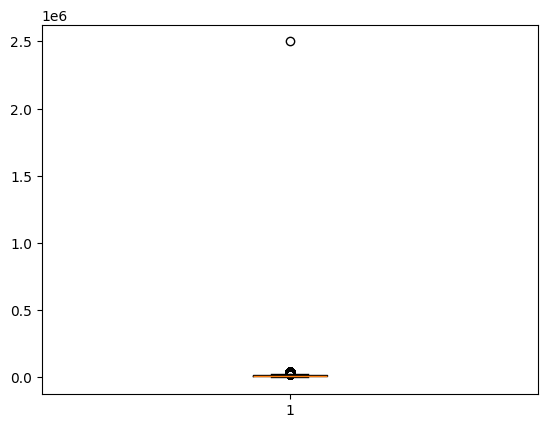

In [ ]:
plt.boxplot(df['loan_amnt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x792448ff3c90>,
 'caps': [<matplotlib.lines.Line2D at 0x792449001090>,
 'boxes': [<matplotlib.lines.Line2D at 0x792448ff3410>],
 'medians': [<matplotlib.lines.Line2D at 0x792449002590>],
 'fliers': [<matplotlib.lines.Line2D at 0x792449002e10>],
 'means': []}

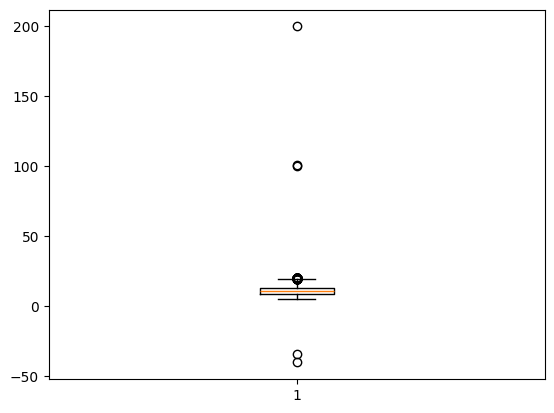

In [ ]:
#plt.boxplot(df['loan_int_rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79244905cf90>,
 'caps': [<matplotlib.lines.Line2D at 0x79244905e2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79244904d690>],
 'medians': [<matplotlib.lines.Line2D at 0x79244905f5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79244905ff90>],
 'means': []}

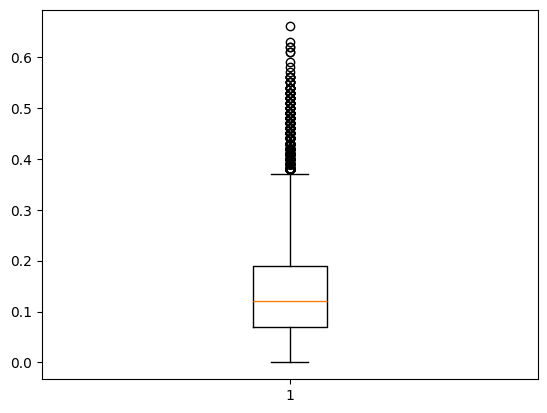

In [ ]:
#plt.boxplot(df['loan_percent_income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7924490b4390>,
 'caps': [<matplotlib.lines.Line2D at 0x7924490b5550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7924490afa50>],
 'medians': [<matplotlib.lines.Line2D at 0x7924490b6790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7924490b7090>],
 'means': []}

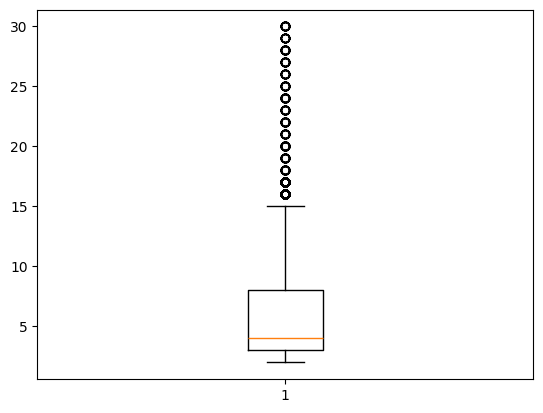

In [ ]:
plt.boxplot(df['cb_person_cred_hist_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x792448d1a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x792448fb7410>,
 'boxes': [<matplotlib.lines.Line2D at 0x792447d23410>],
 'medians': [<matplotlib.lines.Line2D at 0x792448fb5090>],
 'fliers': [<matplotlib.lines.Line2D at 0x792448d0d6d0>],
 'means': []}

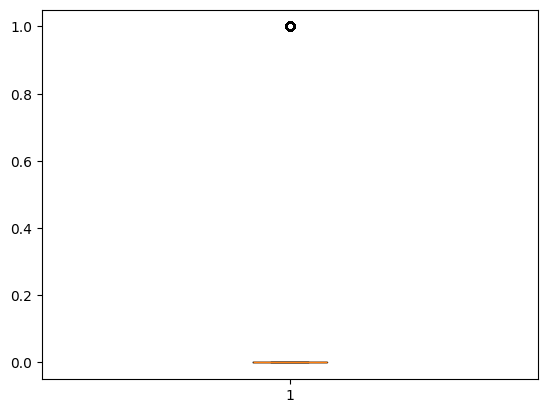

In [ ]:
plt.boxplot(df['loan_status'])

{'whiskers': [<matplotlib.lines.Line2D at 0x792448f19310>,
 'caps': [<matplotlib.lines.Line2D at 0x792448f1a590>,
 'boxes': [<matplotlib.lines.Line2D at 0x792448f18990>],
 'medians': [<matplotlib.lines.Line2D at 0x792448f1b7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x792448f28090>],
 'means': []}

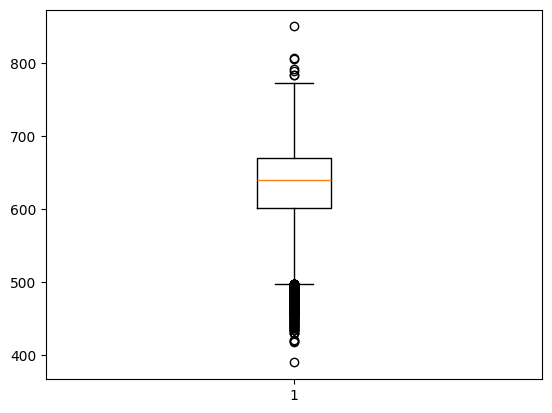

In [ ]:
#plt.boxplot(df['credit_score'])

Handling outliers

In [ ]:
#df['person_age'] = pd.to_numeric(df['person_age'])
#Q1=df['person_age'].quantile(0.25)
#Q3=df['person_age'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['person_age']<(lowerbound))|(
        #df['person_age']>(upperbound)))]

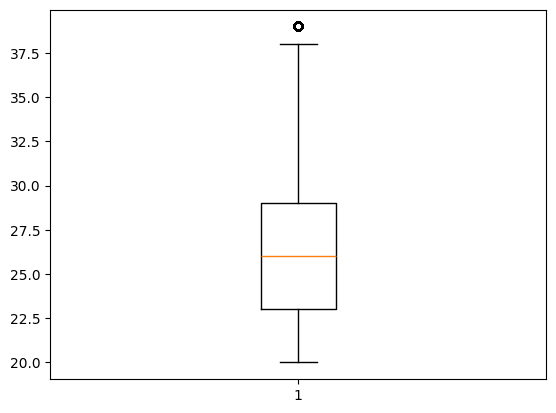

In [ ]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['person_age'])
#plt.show()

In [ ]:
df['person_income'] = pd.to_numeric(df['person_income'])
Q1=df['person_income'].quantile(0.25)
Q3=df['person_income'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['person_income']<(lowerbound))|(
        df['person_income']>(upperbound)))]

/tmp/ipython-input-45-365852246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_income'] = pd.to_numeric(df['person_income'])


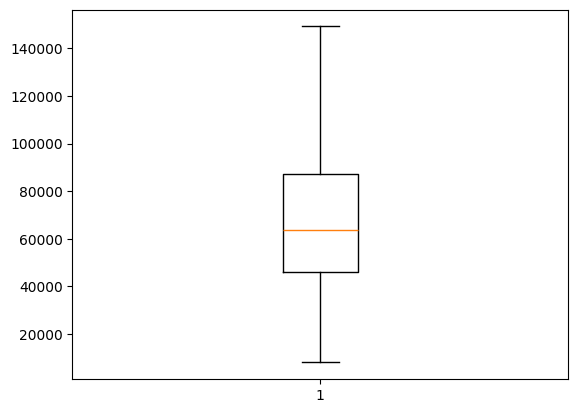

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['person_income'])
plt.show()

In [ ]:
df['person_emp_exp'] = pd.to_numeric(df['person_emp_exp'])
Q1=df['person_emp_exp'].quantile(0.25)
Q3=df['person_emp_exp'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['person_emp_exp']<(lowerbound))|(
        df['person_emp_exp']>(upperbound)))]

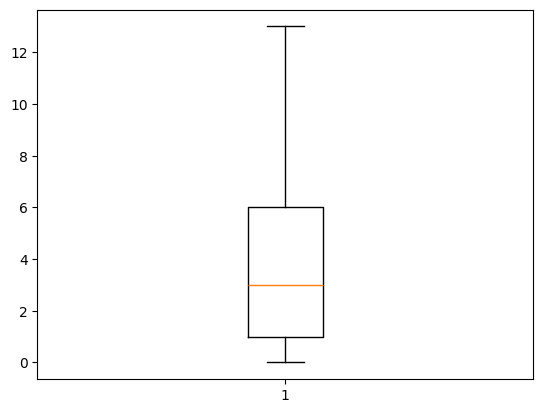

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['person_emp_exp'])
plt.show()

In [ ]:
df['loan_status'] = pd.to_numeric(df['loan_status'])
Q1=df['loan_status'].quantile(0.25)
Q3=df['loan_status'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['loan_status']<(lowerbound))|(
        df['loan_status']>(upperbound)))]

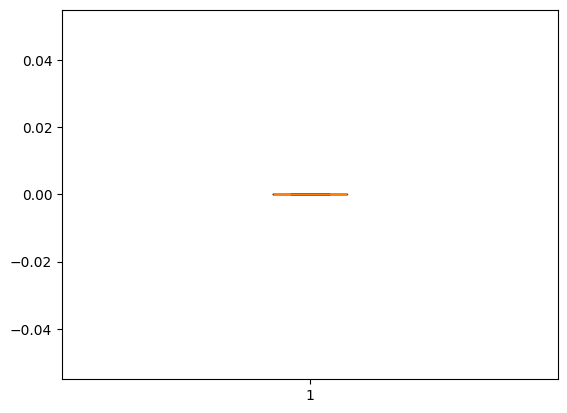

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['loan_status'])
plt.show()

In [ ]:
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'])
Q1=df['loan_amnt'].quantile(0.25)
Q3=df['loan_amnt'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['loan_amnt']<(lowerbound))|(
        df['loan_amnt']>(upperbound)))]

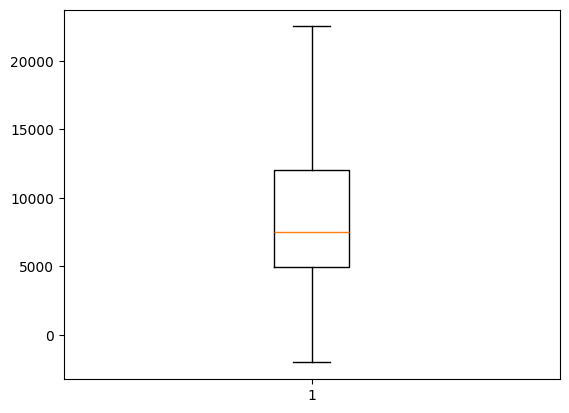

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['loan_amnt'])
plt.show()

In [ ]:
#df['loan_int_rate'] = pd.to_numeric(df['loan_int_rate'])
#Q1=df['loan_int_rate'].quantile(0.25)
#Q3=df['loan_int_rate'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['loan_int_rate']<(lowerbound))|(
        #df['loan_int_rate']>(upperbound)))]

/tmp/ipython-input-28-3229756652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_int_rate'] = pd.to_numeric(df['loan_int_rate'])


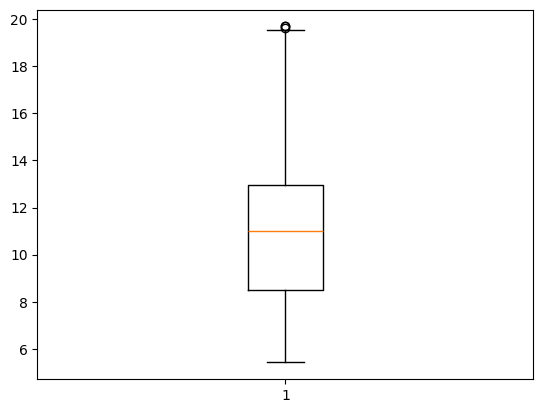

In [ ]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['loan_int_rate'])
#plt.show()

In [ ]:
#df['loan_percent_income'] = pd.to_numeric(df['loan_percent_income'])
#Q1=df['loan_percent_income'].quantile(0.25)
#Q3=df['loan_percent_income'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['loan_percent_income']<(lowerbound))|(
        #df['loan_percent_income']>(upperbound)))]

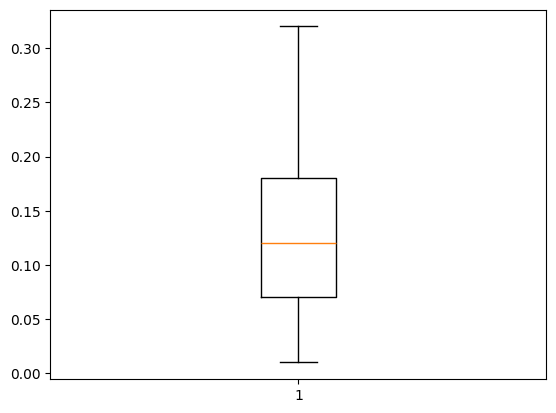

In [ ]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['loan_percent_income'])
#plt.show()

In [ ]:
df['cb_person_cred_hist_length'] = pd.to_numeric(df['cb_person_cred_hist_length'])
Q1=df['cb_person_cred_hist_length'].quantile(0.25)
Q3=df['cb_person_cred_hist_length'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['cb_person_cred_hist_length']<(lowerbound))|(
        df['cb_person_cred_hist_length']>(upperbound)))]

/tmp/ipython-input-32-2266440808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cb_person_cred_hist_length'] = pd.to_numeric(df['cb_person_cred_hist_length'])


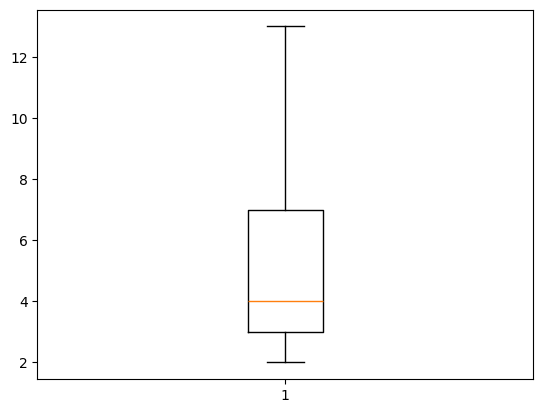

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['cb_person_cred_hist_length'])
plt.show()

In [ ]:
#df['credit_score'] = pd.to_numeric(df['credit_score'])
#Q1=df['credit_score'].quantile(0.25)
#Q3=df['credit_score'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['credit_score']<(lowerbound))|(
        #df['credit_score']>(upperbound)))]

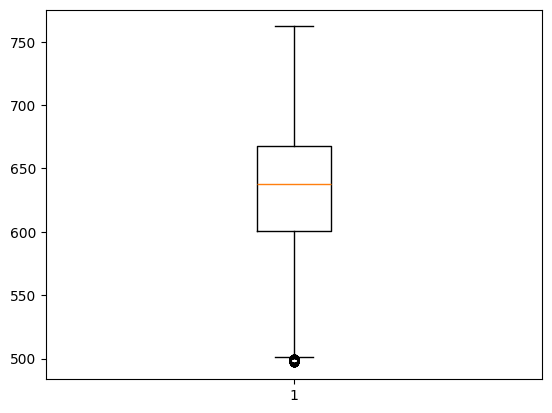

In [ ]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['credit_score'])
#plt.show()

label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_gender'] = le.fit_transform(df['person_gender'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
5,21,0,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2,532,No,1
9,21,0,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3,640,No,1
19,24,0,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2,679,No,1
23,24,0,Bachelor,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3,600,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,31,1,Master,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7,722,No,1
44993,27,0,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5,505,No,1
44995,27,1,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44997,33,1,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_education'] = le.fit_transform(df['person_education'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
5,21,0,3,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2,532,No,1
9,21,0,3,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3,640,No,1
19,24,0,4,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2,679,No,1
23,24,0,1,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3,600,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,31,1,4,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7,722,No,1
44993,27,0,3,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5,505,No,1
44995,27,1,0,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44997,33,1,0,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
5,21,0,3,12951.0,0,2,2500.0,VENTURE,7.14,0.19,2,532,No,1
9,21,0,3,12739.0,0,2,1600.0,VENTURE,14.74,0.13,3,640,No,1
19,24,0,4,14283.0,1,0,1750.0,EDUCATION,10.99,0.12,2,679,No,1
23,24,0,1,13866.0,0,2,1500.0,PERSONAL,7.29,0.11,3,600,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,31,1,4,136832.0,9,3,12319.0,PERSONAL,16.92,0.09,7,722,No,1
44993,27,0,3,35512.0,4,3,5000.0,PERSONAL,15.83,0.14,5,505,No,1
44995,27,1,0,47971.0,6,3,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44997,33,1,0,56942.0,7,3,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504,Yes,0
5,21,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2,532,No,1
9,21,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3,640,No,1
19,24,0,4,14283.0,1,0,1750.0,1,10.99,0.12,2,679,No,1
23,24,0,1,13866.0,0,2,1500.0,4,7.29,0.11,3,600,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,31,1,4,136832.0,9,3,12319.0,4,16.92,0.09,7,722,No,1
44993,27,0,3,35512.0,4,3,5000.0,4,15.83,0.14,5,505,No,1
44995,27,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3,645,No,1
44997,33,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10,668,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504,1,0
5,21,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2,532,0,1
9,21,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3,640,0,1
19,24,0,4,14283.0,1,0,1750.0,1,10.99,0.12,2,679,0,1
23,24,0,1,13866.0,0,2,1500.0,4,7.29,0.11,3,600,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,31,1,4,136832.0,9,3,12319.0,4,16.92,0.09,7,722,0,1
44993,27,0,3,35512.0,4,3,5000.0,4,15.83,0.14,5,505,0,1
44995,27,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3,645,0,1
44997,33,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10,668,0,1


In [ ]:
df.corr()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,-0.008379,-0.025237,0.098250,0.892524,-0.036691,0.040146,0.028584,0.003258,-0.032487,0.791155,0.120213,-0.005353,-0.025580
person_gender,-0.008379,1.000000,-0.001433,0.012171,-0.013041,0.000422,0.006534,-0.005830,0.000660,-0.000562,-0.011154,-0.004400,0.003618,0.002782
person_education,-0.025237,-0.001433,1.000000,0.002199,-0.021944,-0.001616,-0.001755,0.003279,0.005419,-0.004120,-0.021232,0.018657,-0.007413,0.001860
person_income,0.098250,0.012171,0.002199,1.000000,0.078270,-0.353225,0.375532,-0.004580,-0.065181,-0.360271,0.062533,0.014181,0.133423,-0.259571
person_emp_exp,0.892524,-0.013041,-0.021944,0.078270,1.000000,-0.032624,0.033937,0.026989,0.008695,-0.023556,0.713557,0.132856,-0.011827,-0.021661
person_home_ownership,-0.036691,0.000422,-0.001616,-0.353225,-0.032624,1.000000,-0.123752,0.000370,0.153520,0.145227,-0.025147,-0.004025,-0.107254,0.203972
loan_amnt,0.040146,0.006534,-0.001755,0.375532,0.033937,-0.123752,1.000000,-0.001070,0.082223,0.642589,0.025466,0.000829,-0.020447,0.044315
loan_intent,0.028584,-0.005830,0.003279,-0.004580,0.026989,0.000370,-0.001070,1.000000,-0.004844,0.002216,0.024964,0.012993,0.036913,-0.071242
loan_int_rate,0.003258,0.000660,0.005419,-0.065181,0.008695,0.153520,0.082223,-0.004844,1.000000,0.111134,0.012732,0.005897,-0.171878,0.326926
loan_percent_income,-0.032487,-0.000562,-0.004120,-0.360271,-0.023556,0.145227,0.642589,0.002216,0.111134,1.000000,-0.020372,-0.012946,-0.162839,0.313892
